# Data Analysis on customer churn data

@ Jonit John

#### 30 - 10 - 2023

## Problem Statement 

Here we have telecom company offering mobile services to there customer.
They have noticed that some long time customers leaving for compititors.
We need to identify 

- Why this problem happening ?
- How we can prevent this problem ?
- How much churn rate is going to happen ?

## Importance of customer churn prediction 

- Predicting and analysing customer churn is a crucial for telecom company
- It allows them to identify which customer at rick of leaving and take step to retain them
- By doing so , we can reduce revenue loss, maintain customer loyalty and even gain a compatitve edge in the market 

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Loading data

In [2]:
df=pd.read_csv('churn-bigml-20.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


## Data overview

In [4]:
def data_overview(df):
    print("Data Overview\n")
    print('Number of features: \n',df.shape[1])
    print("Fetures: \n", df.columns)
    print('Number of rows: \n',df.shape[0])
    print('Discription on the Data: \n',df.describe())
    print('Data types on the data: \n',df.info())
    print('Number of unique values: \n',df.nunique())
    print('Number of missing values in the data: \n',df.isnull().sum().sum())

In [5]:
data_overview(df)

Data Overview

Number of features: 
 20
Fetures: 
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
Number of rows: 
 667
Discription on the Data: 
        Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000          

## EDA (Exploratory Data analysis)

### Overall percentage of the churn in the data

In [22]:
y_True = df[df["Churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Churn"].shape[0]) * 100 ))

Churn Percentage = 14.24287856071964


### State vise churn rate

<Axes: xlabel='State'>

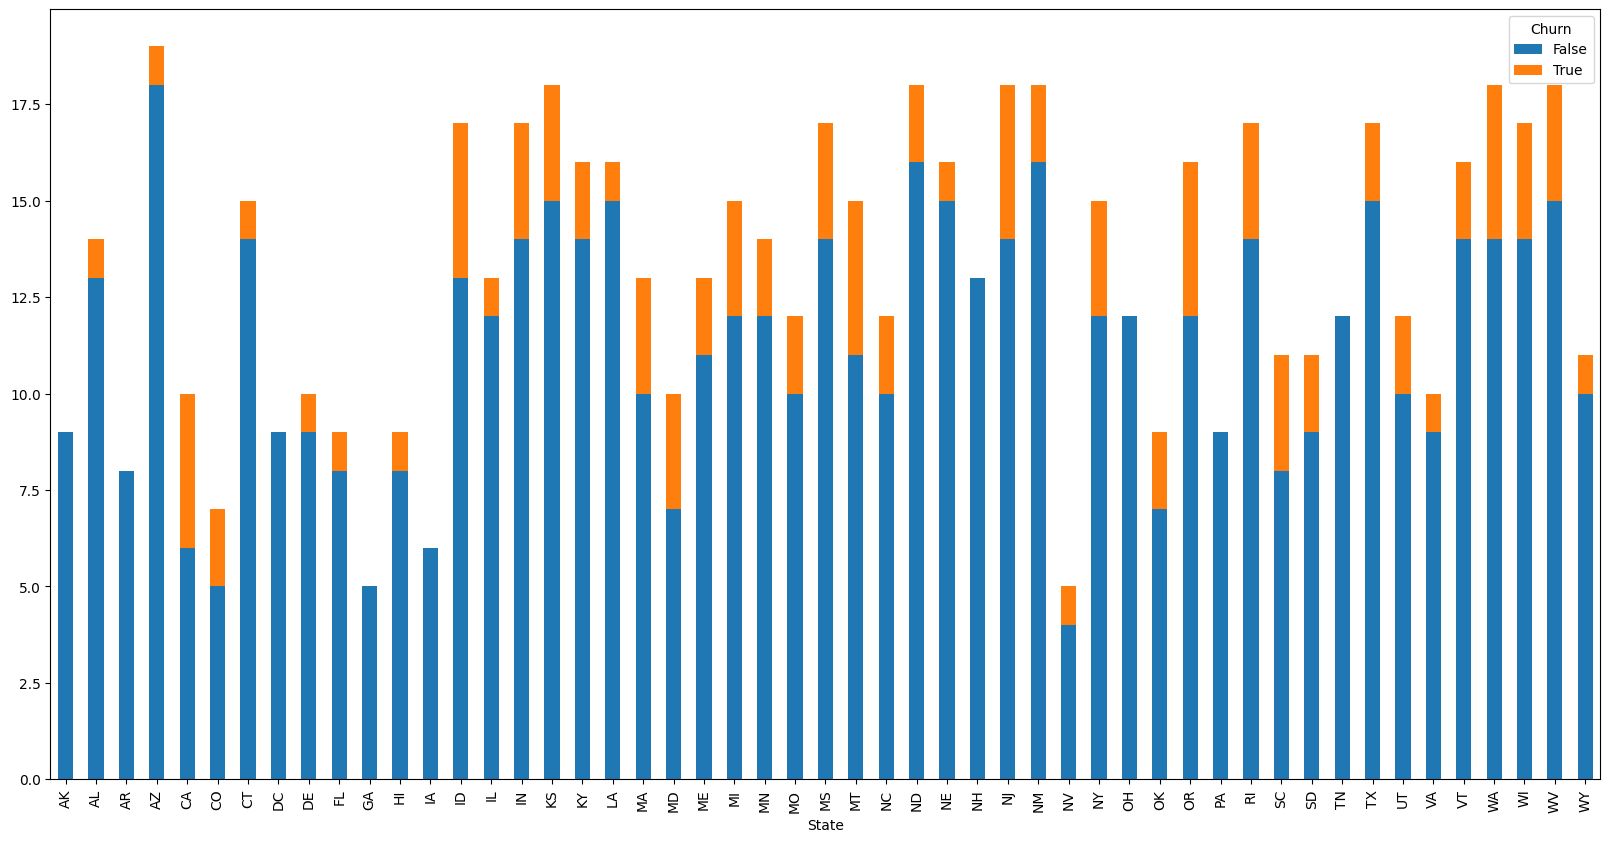

In [23]:
df.groupby(["State", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

### Churn by area code

<Axes: xlabel='Area code'>

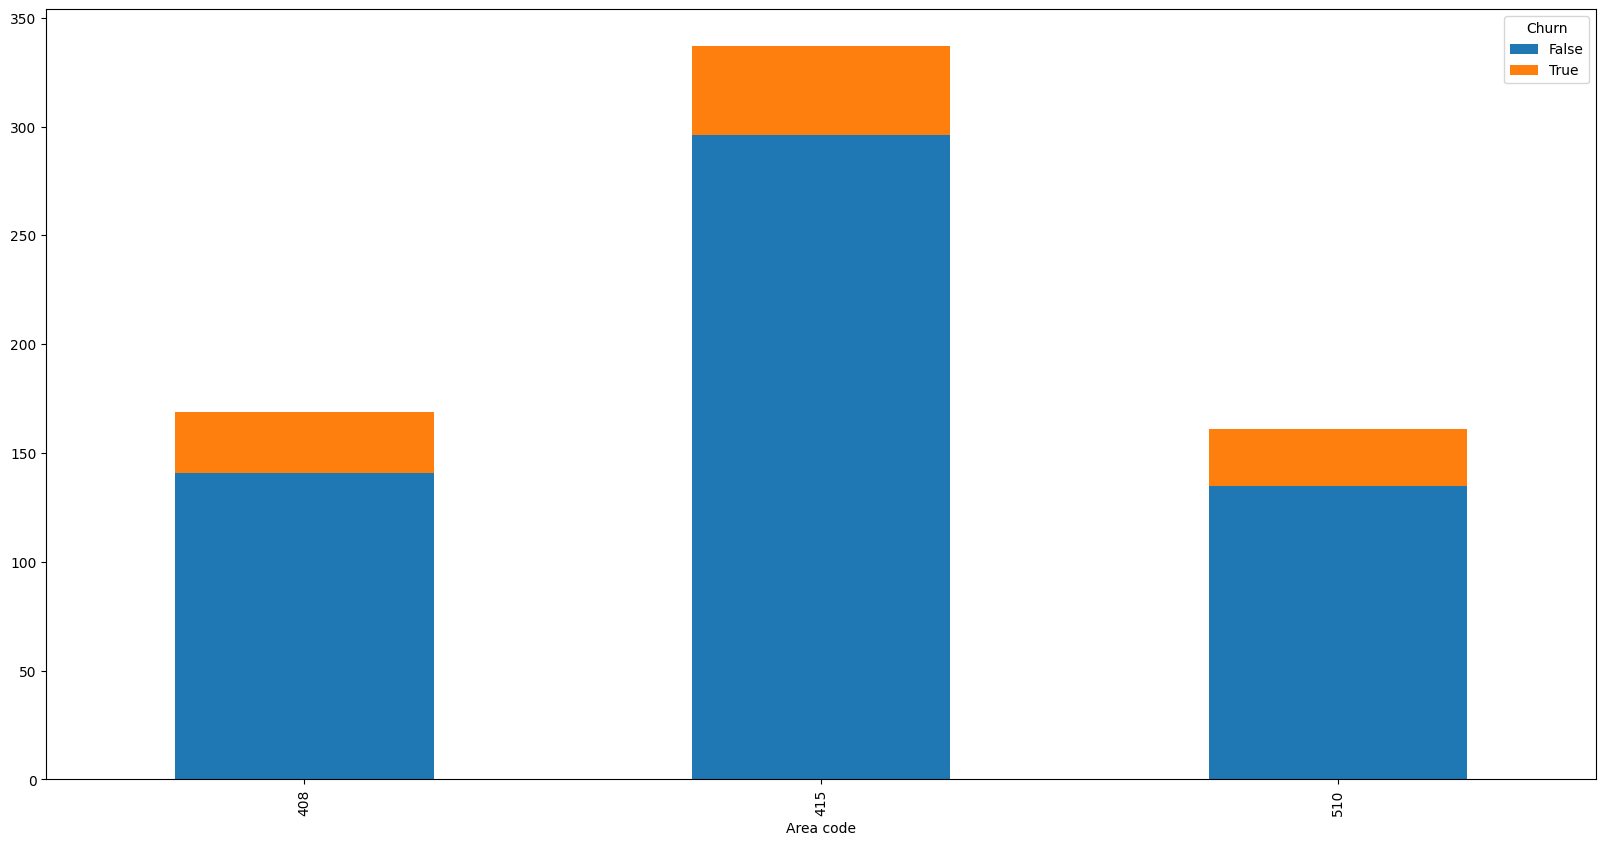

In [24]:
df.groupby(["Area code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

### Churn customer by International plan

<Axes: xlabel='International plan'>

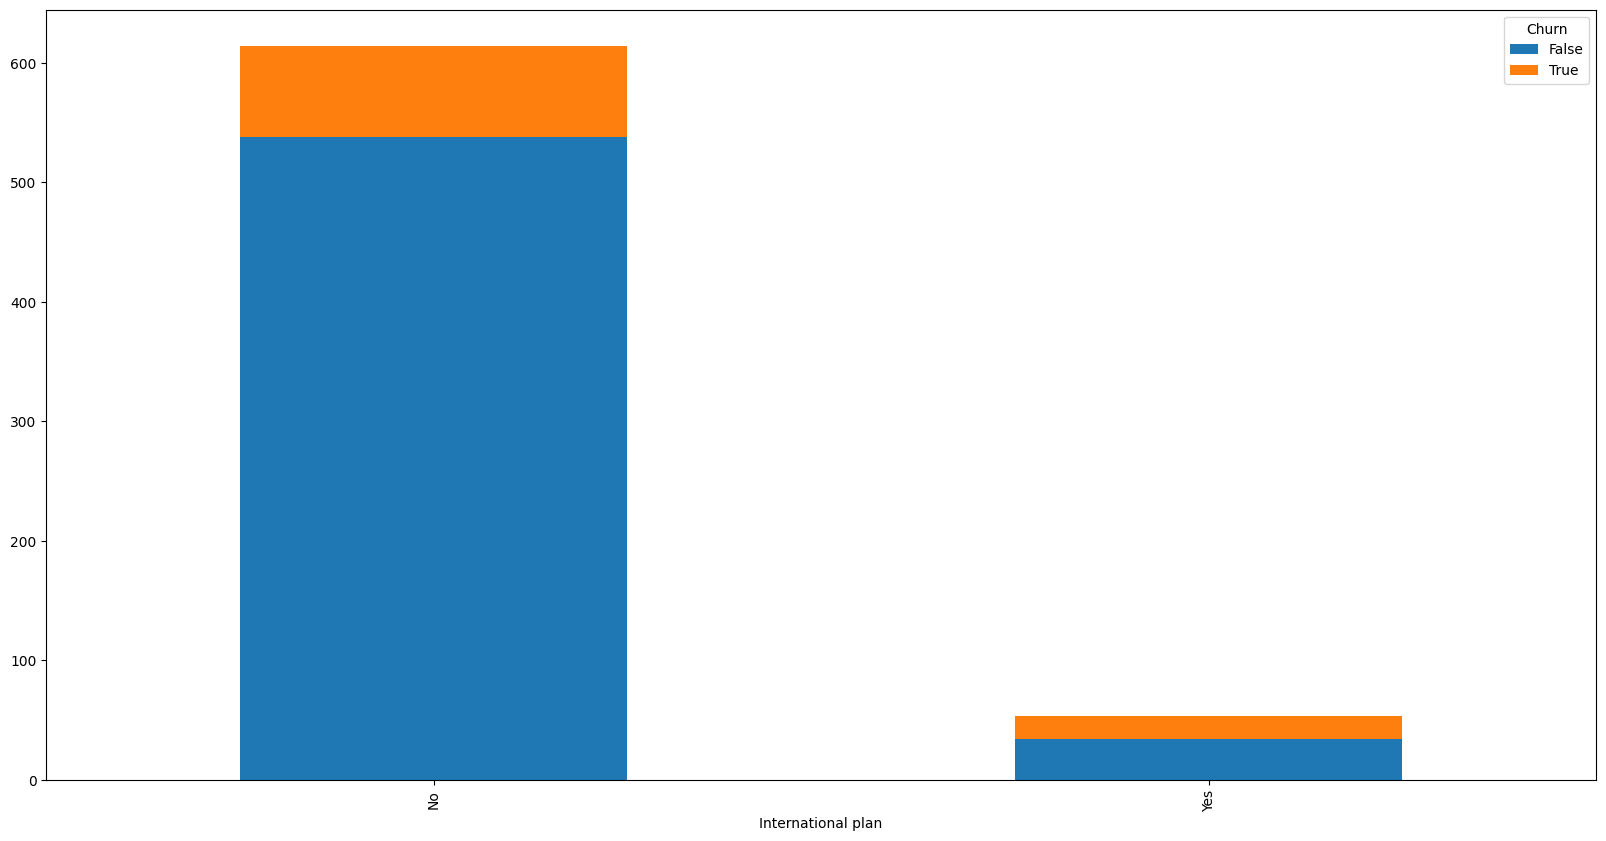

In [25]:
df.groupby(["International plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

### Churn rate by voice mail plan

<Axes: xlabel='Voice mail plan'>

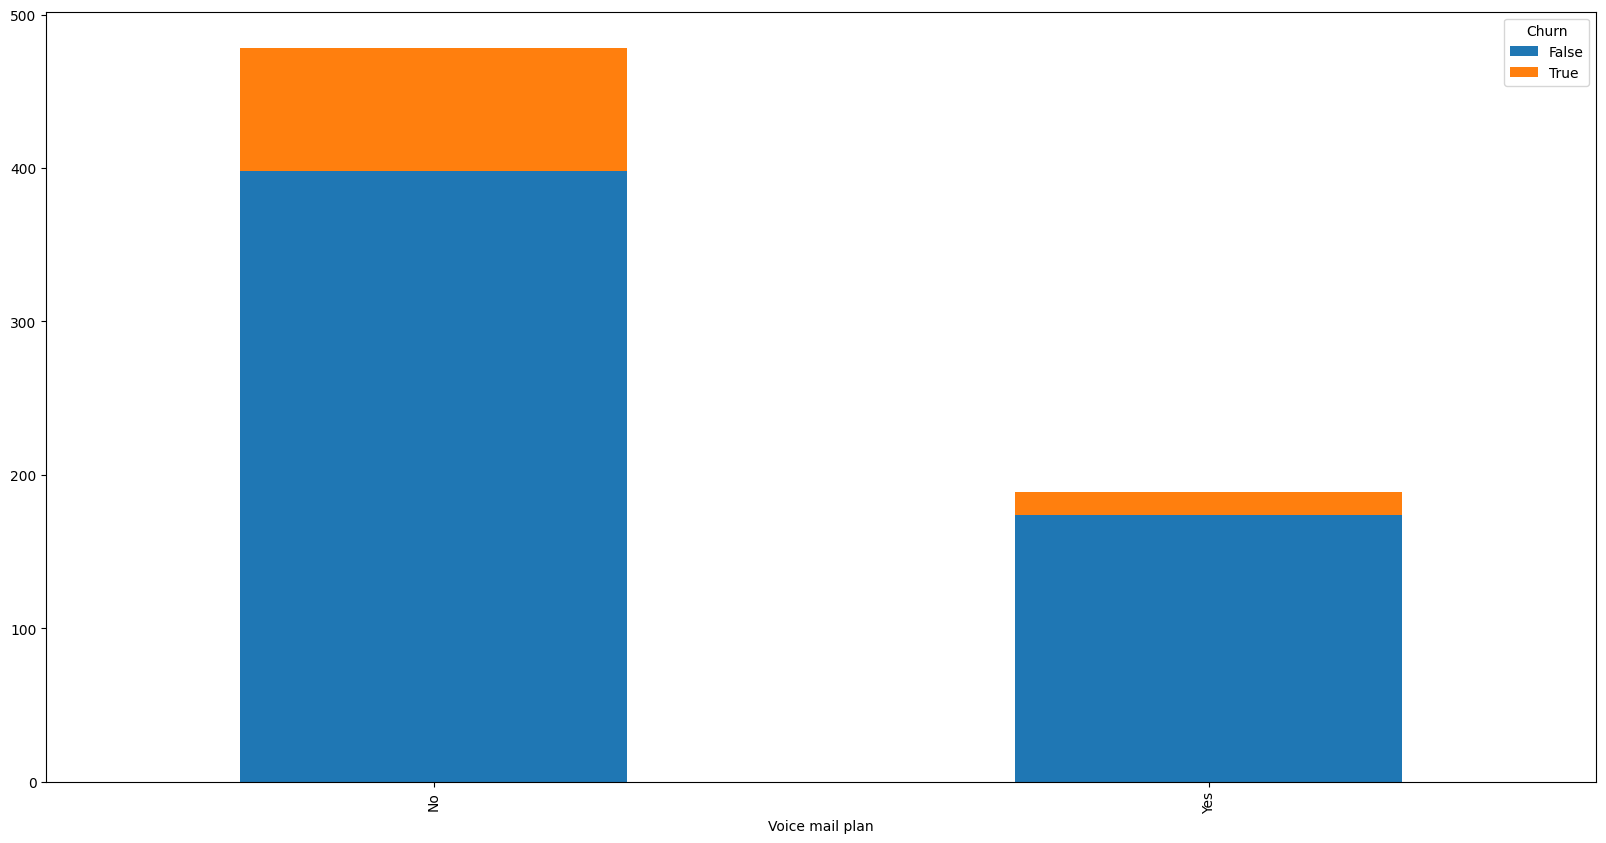

In [26]:
df.groupby(["Voice mail plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

## Customer Segmentation

In [6]:
churn_customer=df[df['Churn'] == True]

In [7]:
stable_customer=df[df['Churn'] == False]

In [8]:
churn_customer.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
7,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
14,LA,155,415,No,No,0,203.4,100,34.58,190.9,104,16.23,196.0,119,8.82,8.9,4,2.40,0,True
16,ID,77,415,No,No,0,251.8,72,42.81,205.7,126,17.48,275.2,109,12.38,9.8,7,2.65,2,True


In [9]:
data_overview(churn_customer)

Data Overview

Number of features: 
 20
Fetures: 
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
Number of rows: 
 95
Discription on the Data: 
        Account length   Area code  Number vmail messages  Total day minutes  \
count       95.000000   95.000000              95.000000          95.000000   
mean       104.073684  438.936842               4.894737         213.991579   
std         36.561299   43.952298              11.853246          70.962188   
min         29.000000  408.000000               0.000000          62.600000   
25%         79.500000  408.000000           

In [10]:
stable_customer.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [11]:
data_overview(stable_customer)

Data Overview

Number of features: 
 20
Fetures: 
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
Number of rows: 
 572
Discription on the Data: 
        Account length   Area code  Number vmail messages  Total day minutes  \
count      572.000000  572.000000             572.000000         572.000000   
mean       102.636364  435.695804               8.991259         175.460140   
std         41.510203   41.434164              14.244485          50.527512   
min          1.000000  408.000000               0.000000          25.900000   
25%         75.000000  415.000000          

In [12]:
state_vs_data_df = df.groupby('State').agg({'Account length': 'sum',
                                          'Number vmail messages': 'sum',
                                          'Total day minutes':'sum',
                                          'Total day calls':'sum',
                                          'Total day charge':'sum',
                                          'Total eve minutes':'sum',
                                          'Total eve calls':'sum',
                                          'Total eve charge':'sum',
                                          'Total night minutes':'sum',
                                          'Total night calls':'sum',
                                          'Total night charge':'sum',
                                          'Total intl minutes':'sum',
                                          'Total intl calls':'sum',
                                          'Total intl charge':'sum',
                                          'Customer service calls':'sum'}).reset_index()

In [15]:
state_vs_data_df.head(2)

,State,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,AK,720,159,1530.3,885,260.15,1646.6,913,139.96,1715.8,845,77.21,85.2,40,23.02,16
1,AL,1368,129,2448.2,1365,416.19,2912.3,1404,247.55,2770.0,1208,124.65,150.6,66,40.67,15


In [16]:
state_vs_data_churn = churn_customer.groupby('State').agg({'Account length': 'sum',
                                          'Number vmail messages': 'sum',
                                          'Total day minutes':'sum',
                                          'Total day calls':'sum',
                                          'Total day charge':'sum',
                                          'Total eve minutes':'sum',
                                          'Total eve calls':'sum',
                                          'Total eve charge':'sum',
                                          'Total night minutes':'sum',
                                          'Total night calls':'sum',
                                          'Total night charge':'sum',
                                          'Total intl minutes':'sum',
                                          'Total intl calls':'sum',
                                          'Total intl charge':'sum',
                                          'Customer service calls':'sum'}).reset_index()

In [18]:
state_vs_data_churn.head(2)

,State,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,AL,55,0,191.9,91,32.62,256.1,110,21.77,203.7,101,9.17,14.3,6,3.86,1
1,AZ,66,0,154.0,133,26.18,198.9,121,16.91,151.9,100,6.84,9.5,3,2.57,4


In [19]:
state_vs_data_stable = stable_customer.groupby('State').agg({'Account length': 'sum',
                                          'Number vmail messages': 'sum',
                                          'Total day minutes':'sum',
                                          'Total day calls':'sum',
                                          'Total day charge':'sum',
                                          'Total eve minutes':'sum',
                                          'Total eve calls':'sum',
                                          'Total eve charge':'sum',
                                          'Total night minutes':'sum',
                                          'Total night calls':'sum',
                                          'Total night charge':'sum',
                                          'Total intl minutes':'sum',
                                          'Total intl calls':'sum',
                                          'Total intl charge':'sum',
                                          'Customer service calls':'sum'}).reset_index()

In [21]:
state_vs_data_stable.head(2)

,State,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,AK,720,159,1530.3,885,260.15,1646.6,913,139.96,1715.8,845,77.21,85.2,40,23.02,16
1,AL,1313,129,2256.3,1274,383.57,2656.2,1294,225.78,2566.3,1107,115.48,136.3,60,36.81,14


In [69]:
state_vs_data_churn.set_index('State', inplace=True)

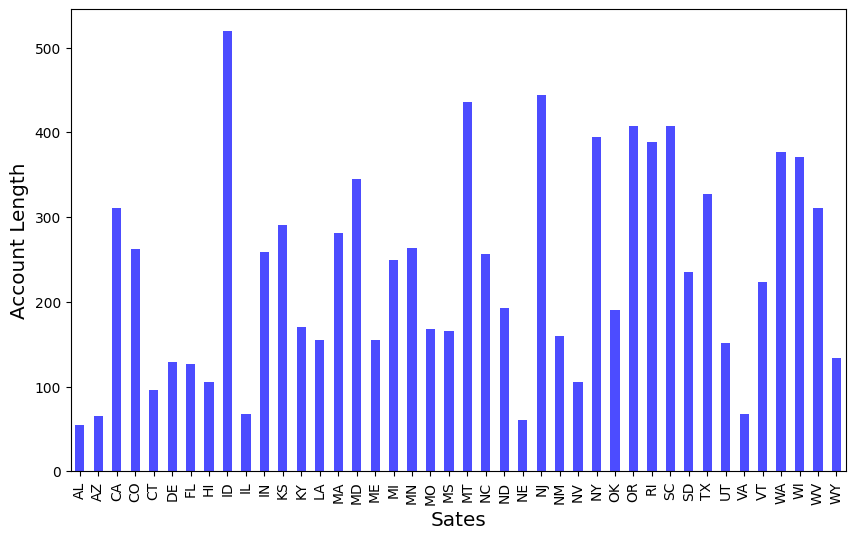

In [79]:
ax1 = state_vs_data_churn['Account length'].plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.7, label='Account length')

plt.xlabel('Sates', fontsize='x-large')
plt.ylabel('Account Length', fontsize='x-large')

plt.show()

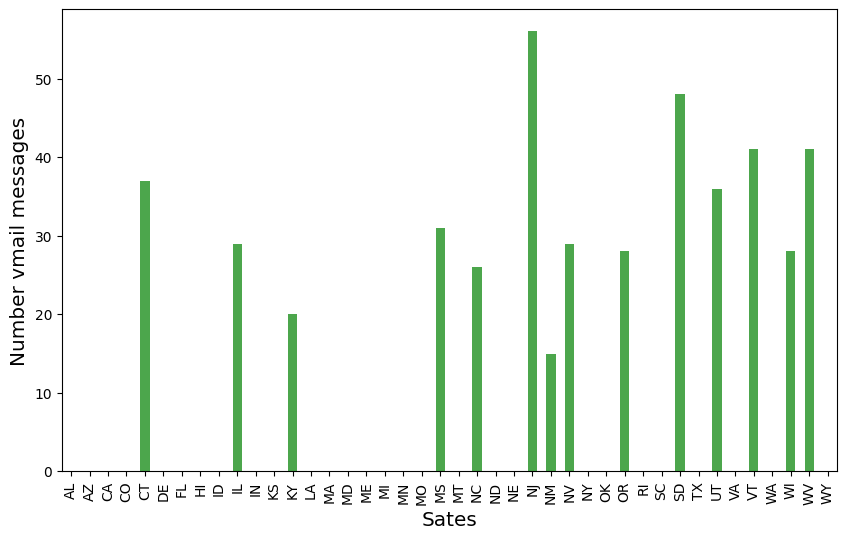

In [80]:
ax1 = state_vs_data_churn['Number vmail messages'].plot(kind='bar', figsize=(10, 6), color='green', alpha=0.7, label='Number vmail messages')

plt.xlabel('Sates', fontsize='x-large')
plt.ylabel('Number vmail messages', fontsize='x-large')

plt.show()

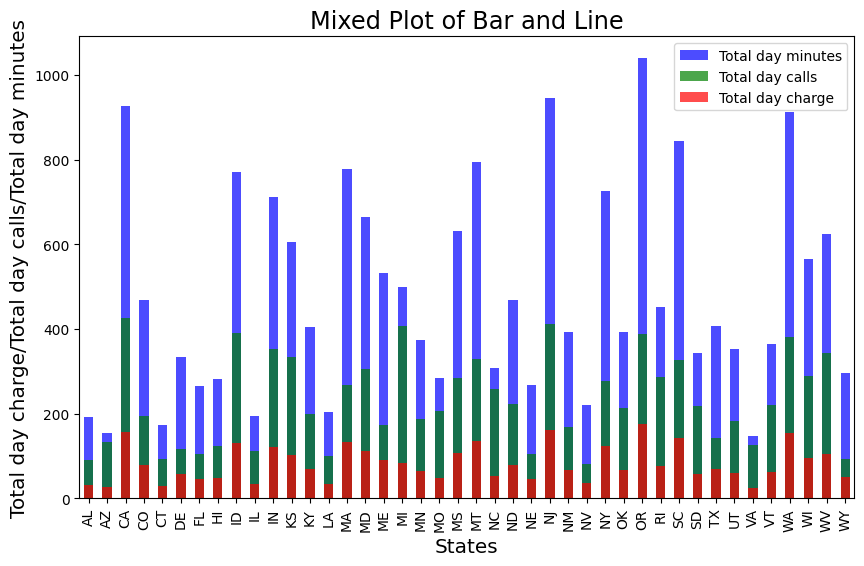

In [86]:
ax1 = state_vs_data_churn['Total day minutes'].plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.7, label='Total day minutes')
ax2 = state_vs_data_churn['Total day calls'].plot(kind='bar', figsize=(10, 6), color='green', alpha=0.7, label='Total day calls')
ax3 = state_vs_data_churn['Total day charge'].plot(kind='bar', figsize=(10, 6), color='red', alpha=0.7, label='Total day charge')

# Add labels and title
plt.xlabel('States', fontsize='x-large')
plt.ylabel('Total day charge/Total day calls/Total day minutes', fontsize='x-large')
plt.title('Mixed Plot of Bar and Line', fontsize='xx-large')

plt.legend()

plt.show()

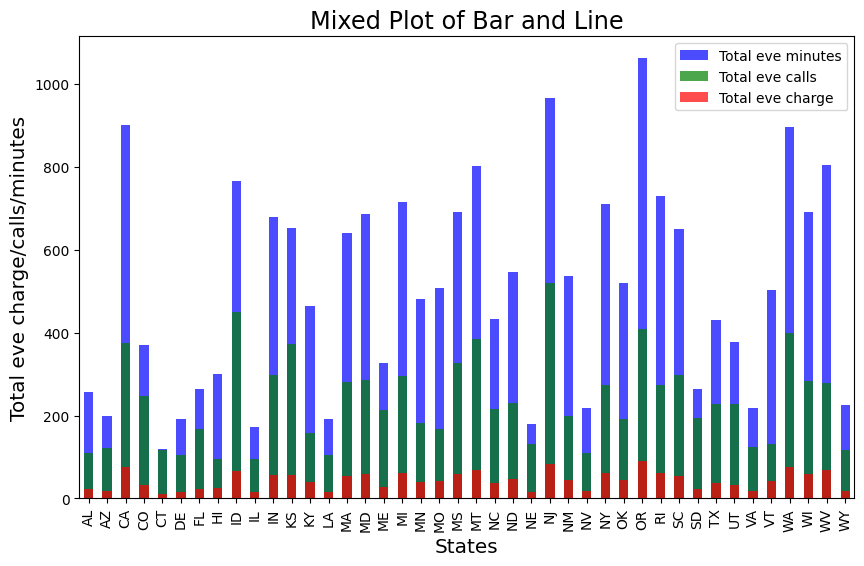

In [88]:
ax1 = state_vs_data_churn['Total eve minutes'].plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.7, label='Total eve minutes')
ax1 = state_vs_data_churn['Total eve calls'].plot(kind='bar', figsize=(10, 6), color='green', alpha=0.7, label='Total eve calls')
ax1 = state_vs_data_churn['Total eve charge'].plot(kind='bar', figsize=(10, 6), color='red', alpha=0.7, label='Total eve charge')

# Add labels and title
plt.xlabel('States', fontsize='x-large')
plt.ylabel('Total eve charge/calls/minutes', fontsize='x-large')
plt.title('Mixed Plot of Bar and Line', fontsize='xx-large')

plt.legend()

plt.show()

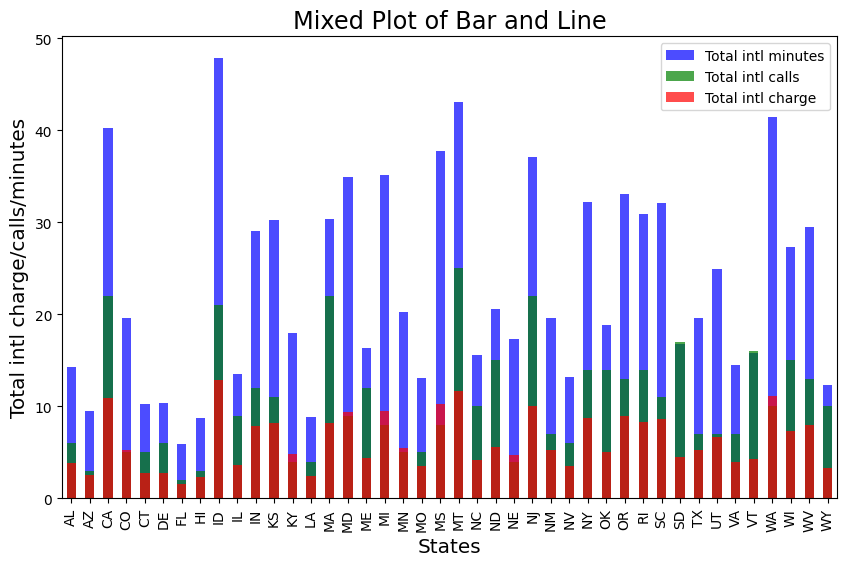

In [90]:
ax1 = state_vs_data_churn['Total intl minutes'].plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.7, label='Total intl minutes')
ax1 = state_vs_data_churn['Total intl calls'].plot(kind='bar', figsize=(10, 6), color='green', alpha=0.7, label='Total intl calls')
ax1 = state_vs_data_churn['Total intl charge'].plot(kind='bar', figsize=(10, 6), color='red', alpha=0.7, label='Total intl charge')

plt.xlabel('States', fontsize='x-large')
plt.ylabel('Total intl charge/calls/minutes', fontsize='x-large')
plt.title('Mixed Plot of Bar and Line', fontsize='xx-large')

plt.legend()

plt.show()

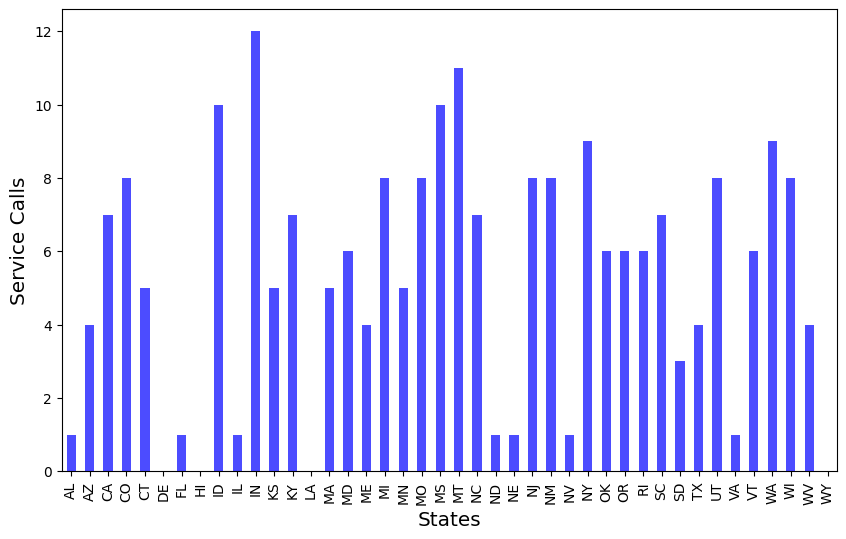

In [91]:
ax1 = state_vs_data_churn['Customer service calls'].plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.7)

plt.xlabel('States', fontsize='x-large')
plt.ylabel('Service Calls', fontsize='x-large')


plt.show()

In [92]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Customer_id
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,1
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,2
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,3
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,4
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,5


In [11]:
data_overview(df)

Data Overview

Number of features: 
 21
Fetures: 
 Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Customer_id'],
      dtype='object')
Number of rows: 
 667
Discription on the Data: 
        Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.0

In [14]:
df['Total minutes']=df[['Total day minutes','Total eve minutes','Total night minutes']].sum(axis=1)

In [16]:
df['Total calls']=df[['Total day calls','Total eve calls','Total night calls']].sum(axis=1)
df['Total charges']=df[['Total day charge','Total eve charge','Total night charge']].sum(axis=1)

In [18]:
total_usage=df[['Customer_id','Total calls','Total minutes','Total charges','Total intl calls','Total intl minutes','Total intl charge','Churn']]

In [19]:
total_usage.head()

,Customer_id,Total calls,Total minutes,Total charges,Total intl calls,Total intl minutes,Total intl charge,Churn
0,1,267,751.9,70.97,4,8.7,2.35,False
1,2,331,566.4,50.77,6,12.7,3.43,True
2,3,292,811.3,90.83,9,5.4,1.46,True
3,4,310,437.3,38.97,6,7.7,2.08,False
4,5,316,513.1,46.60,1,11.1,3.00,False


In [21]:
colors = ['red', 'green', 'blue']
labels = ['Total calls', 'Total minutes', 'Total charges']

In [25]:
scatter_df=total_usage[['Total calls','Total minutes','Total charges']]

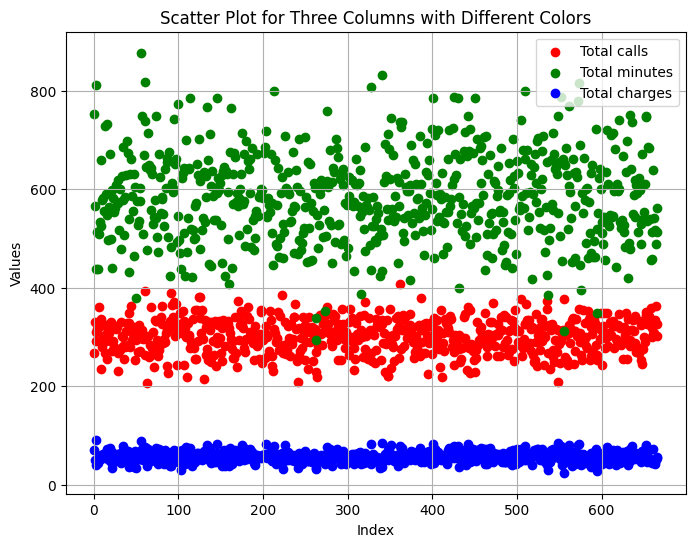

In [26]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(scatter_df.columns):
    plt.scatter(df.index, df[col], c=colors[i], marker='o', label=col)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter Plot for Three Columns with Different Colors')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
train=df[['Account length','Number vmail messages','Total minutes','Total calls','Total charges','Total intl calls','Total intl minutes','Total intl charge','Customer service calls','Churn']]

In [31]:
train.head()

,Account length,Number vmail messages,Total minutes,Total calls,Total charges,Total intl calls,Total intl minutes,Total intl charge,Customer service calls,Churn
0,117,0,751.9,267,70.97,4,8.7,2.35,1,False
1,65,0,566.4,331,50.77,6,12.7,3.43,4,True
2,161,0,811.3,292,90.83,9,5.4,1.46,4,True
3,111,0,437.3,310,38.97,6,7.7,2.08,2,False
4,49,0,513.1,316,46.60,1,11.1,3.00,1,False


In [32]:
data_overview(train)

Data Overview

Number of features: 
 10
Fetures: 
 Index(['Account length', 'Number vmail messages', 'Total minutes',
       'Total calls', 'Total charges', 'Total intl calls',
       'Total intl minutes', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
Number of rows: 
 667
Discription on the Data: 
        Account length  Number vmail messages  Total minutes  Total calls  \
count      667.000000             667.000000     667.000000   667.000000   
mean       102.841079               8.407796     583.988756   301.527736   
std         40.819480              13.994480      88.971097    34.486848   
min          1.000000               0.000000     292.600000   206.000000   
25%         76.000000               0.000000     525.000000   278.000000   
50%        102.000000               0.000000     582.100000   303.000000   
75%        128.000000              20.000000     640.700000   326.000000   
max        232.000000              51.000000     87

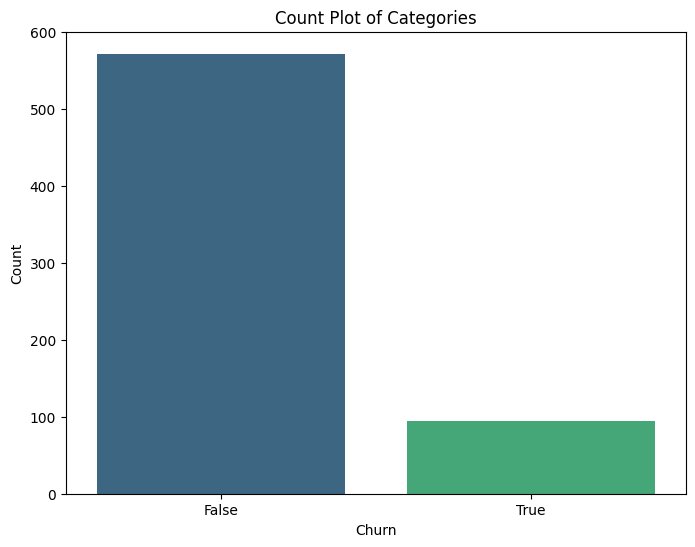

In [33]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=train, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot of Categories')
plt.show()

In [34]:
corr_metrix=train.corr()

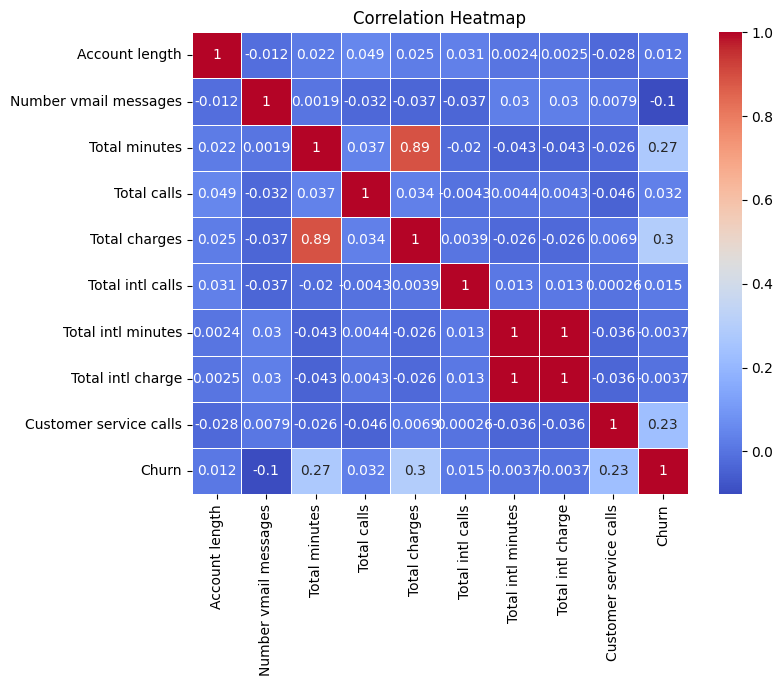

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_metrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()


### Here's what each pair of variables' correlation indicates:
- **Account length** has a waek postitve correlation with **Total minutes** **(0.022)**
- **Account length** has a very weak negative correlation with **Number of vmail messages** **(-0.012)**
- **Total minutes** has a weak postive correlation with **Total charges** **(0.889)**
- **Total minutes** has a weak positive correlation with **Total calls** **(0.037)**
- **Total calls** has a weak positive correlation with **Total charges** **(0.034)**

- **Total intl calls** and **Totak intl minutes** have very weak positive correlation with other variables.
#### The variable **Churn** has correlation with other variables:  

- It has a positive correlation of *0.273*  with **Totlk minutes**, Indiacating that as the **Total minute**s increase, the likelihood of churn increases.
- It has a positive correlation of *0.296* with **Total charges**, suggesting that higher charges are associated with higher rate of churn.
- It has a positive correlation of *0.233* with **Customer service calls**, indicating that more customer service calls may leas to higher churn.efforts.






## Conclusion

#### The problem we were trying solve was to asnwer three question we have here:

- Why this problem happening ?- 
How we can prevent this problem ?- 
How much churn rate is going to happen

So the answers to the questions we found through this analysis and our model 

The problem is occures due to the sudden increase in the charges and the number of service call become more.
The increase in the total charges is affected the total minutes usage of the customer. 
Appart from that customers are facing techinical issues from the service that is why the service calls are inclreasing.

When it comes to compititors they are giving offers to there stable customer 

#### So solution to this problems 

- ** Give offers to the exisiting customers based on there usage**
- ** Give joining offer for new customers **
- ** Try to fix the technical error in the system mostly the network issues **
- ** Find a survay mechanism  ?